<a href="https://colab.research.google.com/github/yusukennn/pytorch_prac/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch==1.6.0+cu101
!pip3 install torchvision==0.7.0+cu101
!pip3 install numpy==1.18.5
!pip3 install matplotlib==3.2.2
!pip3 install scikit-learn==0.23.1
!pip3 install seaborn==0.11.0

ERROR: Could not find a version that satisfies the requirement torch==1.6.0+cu101 (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2, 0.3.1, 0.4.0, 0.4.1, 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1)
ERROR: No matching distribution found for torch==1.6.0+cu101
ERROR: Could not find a version that satisfies the requirement torchvision==0.7.0+cu101 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.8.0, 0.8.1, 0.8.2)
ERROR: No matching distribution found for torchvision==0.7.0+cu101
     |████████████████████████████████| 20.1MB 166kB/s 
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9

     |████████████████████████████████| 6.9MB 20.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 286kB 19.1MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [ ]:
# 必要なパッケージのインストール
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim

In [ ]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
# 品種の追加
df['Variety'] = iris.target
df.loc[df['Variety'] == 0, 'Variety'] = 'setosa'
df.loc[df['Variety'] == 1, 'Variety'] = 'versicolor'
df.loc[df['Variety'] == 2, 'Variety'] = 'virginica'
print(df.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Variety
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]


In [ ]:
# 基本統計量の確認
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000


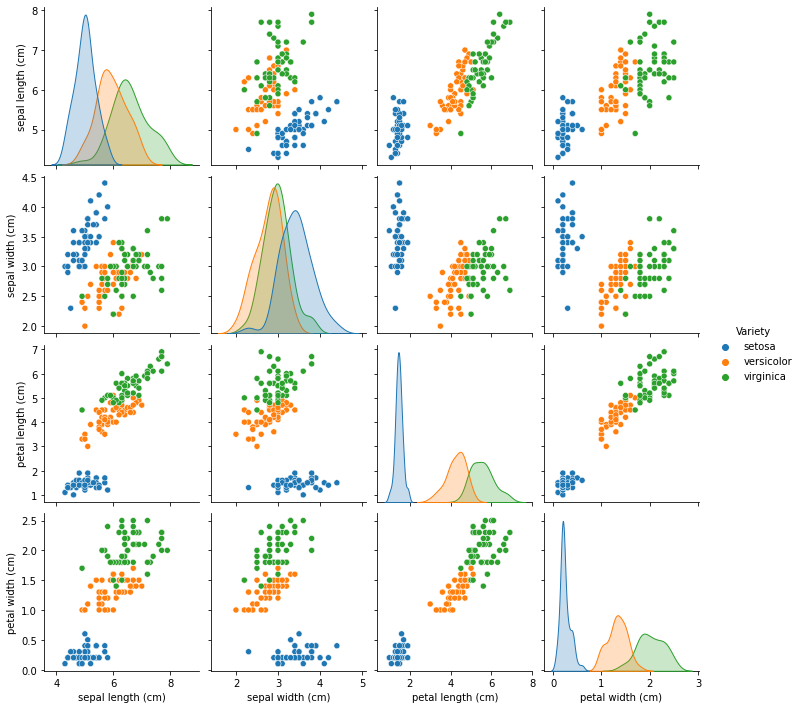

In [ ]:
# データセットの可視化
sns.pairplot(df, hue='Variety')
plt.show()

In [ ]:
# データセットの読み込み
iris = load_iris()
data = iris.data  # 特徴量
label = iris.target # ラベル

訓練データとテストデータの用意

In [ ]:
# 学習データとテストデータを分割
train_data, test_data, train_label, test_label = train_test_split(
    data, label, test_size=0.2)

# 学習データとテストデータのサイズの確認
print("train_data size: {}".format(len(train_data)))
print("test_data size: {}".format(len(test_data)))
print("train_label size: {}".format(len(train_label)))
print("test_label size: {}".format(len(test_label)))

train_data size: 4
test_data size: 1
train_label size: 4
test_label size: 1


In [ ]:
# ndarrayをPyTorchのTensorに変換
train_x = torch.Tensor(train_data)
test_x = torch.Tensor(test_data)
train_y = torch.LongTensor(train_label)  # torch.int64のデータ型に
test_y = torch.LongTensor(test_label)  # torch.int64のデータ型に

TypeError: ignored

In [ ]:
# 特徴量とラベルを結合したデータセットを作成
train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

In [ ]:
# ミニバッチサイズを指定したデータローダーを作成
train_batch = DataLoader(
    dataset=train_dataset,  # データセットの指定
    batch_size=5, # バッチサイズの指定
    shuffle=True, # シャッフルするかどうかの指定
    num_workers=2 # コアの数
)
test_batch = DataLoader(
    dataset=test_dataset,
    batch_size=5,
    shuffle=False,
    num_workers=2
)

for data, label in train_batch:
    print("batch data size: {}".format(data.size()))  # バッチの入力データサイズ
    print("batch label size: {}".format(label.size()))  # バッチのラベルサイズ
    break

# ニューラルネットワークの定義

In [ ]:
# ニューラルネットワークの定義
class Net(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, D_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = self.linear2(x)
    return x

In [ ]:
# ハイパーパラメータの定義
D_in = 4  # 入力次元: 4
H = 100  # 隠れ層次元: 100
D_out = 3  # 出力次元: 3
epoch = 100  # 学習回数

In [ ]:
# ネットワークのロード
# CPUとGPUどちらを使うかを指定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net(D_in, H, D_out).to(device)
# デバイスの確認
print("Device: {}".format(device))

Device: cuda


損失関数と最適関数の定義

In [ ]:
# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化関数の定義
optimizer = optim.Adam(net.parameters())

# 学習

In [ ]:
# 損失と正解率を保存するリストを作成
train_loss_list = []  # 学習損失
train_accuracy_list = []  # 学習データの正答率
test_loss_list = []  # 評価損失
test_accuracy_list = []  # テストデータの正答率

# 学習（エポック）の実行
for i in range(epoch):
    # エポックの進行状況を表示
    print('---------------------------------------------')
    print("Epoch: {}/{}".format(i+1, epoch))

    # 損失と正解率の初期化
    train_loss = 0  # 学習損失
    train_accuracy = 0  # 学習データの正答数
    test_loss = 0  # 評価損失
    test_accuracy = 0  # テストデータの正答数

    # ---------学習パート--------- #
    # ニューラルネットワークを学習モードに設定
    net.train()
    # ミニバッチごとにデータをロードし学習
    for data, label in train_batch:
        # GPUにTensorを転送
        data = data.to(device)
        label = label.to(device)

        # 勾配を初期化
        optimizer.zero_grad()
        # データを入力して予測値を計算（順伝播）
        y_pred_prob = net(data)
        # 損失（誤差）を計算
        loss = criterion(y_pred_prob, label)
        # 勾配の計算（逆伝搬）
        loss.backward()
        # パラメータ（重み）の更新
        optimizer.step()

        # ミニバッチごとの損失を蓄積
        train_loss += loss.item()

        # 予測したラベルを予測確率y_pred_probから計算
        y_pred_label = torch.max(y_pred_prob, 1)[1]
        # ミニバッチごとに正解したラベル数をカウント
        train_accuracy += torch.sum(y_pred_label == label).item() / len(label)

    # ミニバッチの平均の損失と正解率を計算
    batch_train_loss = train_loss / len(train_batch)
    batch_train_accuracy = train_accuracy / len(train_batch)
    # ---------学習パートはここまで--------- #

    # ---------評価パート--------- #
    # ニューラルネットワークを評価モードに設定
    net.eval()
    # 評価時の計算で自動微分機能をオフにする
    with torch.no_grad():
        for data, label in test_batch:
            # GPUにTensorを転送
            data = data.to(device)
            label = label.to(device)
            # データを入力して予測値を計算（順伝播）
            y_pred_prob = net(data)
            # 損失（誤差）を計算
            loss = criterion(y_pred_prob, label)
            # ミニバッチごとの損失を蓄積
            test_loss += loss.item()

            # 予測したラベルを予測確率y_pred_probから計算
            y_pred_label = torch.max(y_pred_prob, 1)[1]
            # ミニバッチごとに正解したラベル数をカウント
            test_accuracy += torch.sum(y_pred_label == label).item() / len(label)
    # ミニバッチの平均の損失と正解率を計算
    batch_test_loss = test_loss / len(test_batch)
    batch_test_accuracy = test_accuracy / len(test_batch)
    # ---------評価パートはここまで--------- #

    # エポックごとに損失と正解率を表示
    print("Train_Loss: {:.4f} Train_Accuracy: {:.4f}".format(
        batch_train_loss, batch_train_accuracy))
    print("Test_Loss: {:.4f} Test_Accuracy: {:.4f}".format(
        batch_test_loss, batch_test_accuracy))

    # 損失と正解率をリスト化して保存
    train_loss_list.append(batch_train_loss)
    train_accuracy_list.append(batch_train_accuracy)
    test_loss_list.append(batch_test_loss)
    test_accuracy_list.append(batch_test_accuracy)

---------------------------------------------
Epoch: 1/100
Train_Loss: 1.2158 Train_Accuracy: 0.5417
Test_Loss: 1.0093 Test_Accuracy: 0.5000
---------------------------------------------
Epoch: 2/100
Train_Loss: 0.7962 Train_Accuracy: 0.7333
Test_Loss: 0.7654 Test_Accuracy: 0.7667
---------------------------------------------
Epoch: 3/100
Train_Loss: 0.6425 Train_Accuracy: 0.7500
Test_Loss: 0.6899 Test_Accuracy: 0.6000
---------------------------------------------
Epoch: 4/100
Train_Loss: 0.5353 Train_Accuracy: 0.8000
Test_Loss: 0.6092 Test_Accuracy: 0.7333
---------------------------------------------
Epoch: 5/100
Train_Loss: 0.4728 Train_Accuracy: 0.9000
Test_Loss: 0.5796 Test_Accuracy: 0.6333
---------------------------------------------
Epoch: 6/100
Train_Loss: 0.4145 Train_Accuracy: 0.8500
Test_Loss: 0.4884 Test_Accuracy: 0.9667
---------------------------------------------
Epoch: 7/100
Train_Loss: 0.3860 Train_Accuracy: 0.8667
Test_Loss: 0.4447 Test_Accuracy: 0.9667
-------------

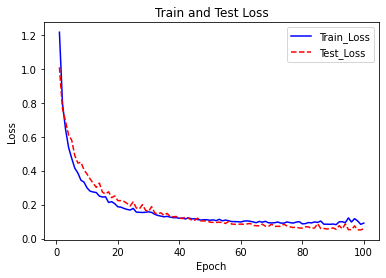

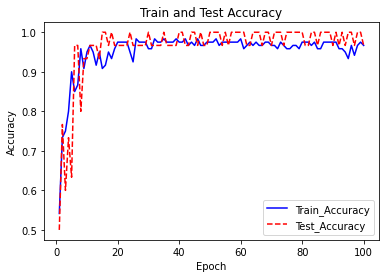

In [ ]:
# 損失
plt.figure()
plt.title('Train and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, epoch+1), train_loss_list, color='blue',
         linestyle='-', label='Train_Loss')
plt.plot(range(1, epoch+1), test_loss_list, color='red',
         linestyle='--', label='Test_Loss')
plt.legend()  # 凡例

# 正解率
plt.figure()
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, epoch+1), train_accuracy_list, color='blue',
         linestyle='-', label='Train_Accuracy')
plt.plot(range(1, epoch+1), test_accuracy_list, color='red',
         linestyle='--', label='Test_Accuracy')
plt.legend()

# 表示
plt.show()

# 新たにテスト用のデータセットを用意して推定したい場合

In [ ]:
# CPUとGPUどちらを使うかを指定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 学習パラメータを保存
torch.save(net.to(device).state_dict(), '3-2_iris_net.pth')

In [ ]:
# ハイパーパラメータの定義
D_in = 4  # 入力次元: 4
H = 100  # 隠れ層次元: 100
D_out = 3  # 出力次元: 3

# 保存した学習パラメータを読み込む
net2 = Net(D_in, H, D_out).to(device)
net2.load_state_dict(torch.load('3-2_iris_net.pth', map_location=device))

<All keys matched successfully>

In [ ]:
# ニューラルネットワークを評価モードに設定
net2.eval()
# 推定時の計算で自動微分機能をオフにする
with torch.no_grad():
    # 初期化
    test_accuracy = 0
    for data, label in test_batch:
        # GPUにTensorを転送
        data = data.to(device)
        label = label.to(device)
        # データを入力して予測値を計算（順伝播）
        y_pred_prob = net(data)
        # 予測したラベルを予測確率y_pred_probから計算
        y_pred_label = torch.max(y_pred_prob, 1)[1]
        # ミニバッチごとに正解したラベル数をカウント
        test_accuracy += torch.sum(y_pred_label == label).item() / len(label)
# ミニバッチの平均の損失と正解率を計算
batch_test_accuracy = test_accuracy / len(test_batch)
# 正解率を表示
print("Accuracy: {:.3f}".format(batch_test_accuracy))

Accuracy: 0.967
